In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
import model

Tensor("Placeholder:0", shape=(?, ?, ?, 3), dtype=float32)
Tensor("conv5_3/conv5_3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rpn_conv/3x3/rpn_conv/3x3:0", shape=(?, ?, ?, 512), dtype=float32)


/home/lhw/anaconda3/envs/python2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensor("lstm_o/Reshape_2:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("lstm_o/Reshape_2:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rpn_cls_score/Reshape_1:0", shape=(?, ?, ?, 20), dtype=float32)
Tensor("rpn_cls_prob:0", shape=(?, ?, ?, ?), dtype=float32)
Tensor("Reshape_2:0", shape=(?, ?, ?, 20), dtype=float32)
Tensor("rpn_bbox_pred/Reshape_1:0", shape=(?, ?, ?, 40), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 3), dtype=float32)
INFO:tensorflow:Restoring parameters from ctpn/models/VGGnet_fast_rcnn_iter_470000.ckpt


Using TensorFlow backend.


In [26]:
from glob import glob
from IPython.display import Image as display
import numpy as np
from PIL import Image
import time
paths = glob('./test/*.*')
paths

['./test/mmexport1530188307091.jpg']

## pytorch crnn

It takes time:9.39522409439s
---------------------------------------
图像的文字朝向为:0度
识别结果:

。
参
爹
O
生一B册,见京体贮的炙行意线旧光京诀器时
-天温水源类别涿层米水
广浙张号M，肌
茹通袋夫山泉份公司
“
红司父类原批州冰次用均烈司

地:们轨州市变县
水就地流江台试实县试训
年道5血I业肌H
气加心-刘预洞，t

.
。知数t
水北拉流江个法长识洲
三g血u心
发气风加飞孙认
可州拉州您然“
。th退市
发的然
宝的wwig
生京生扩日言流了代码
5然幺a
’wwwongusrimg-"


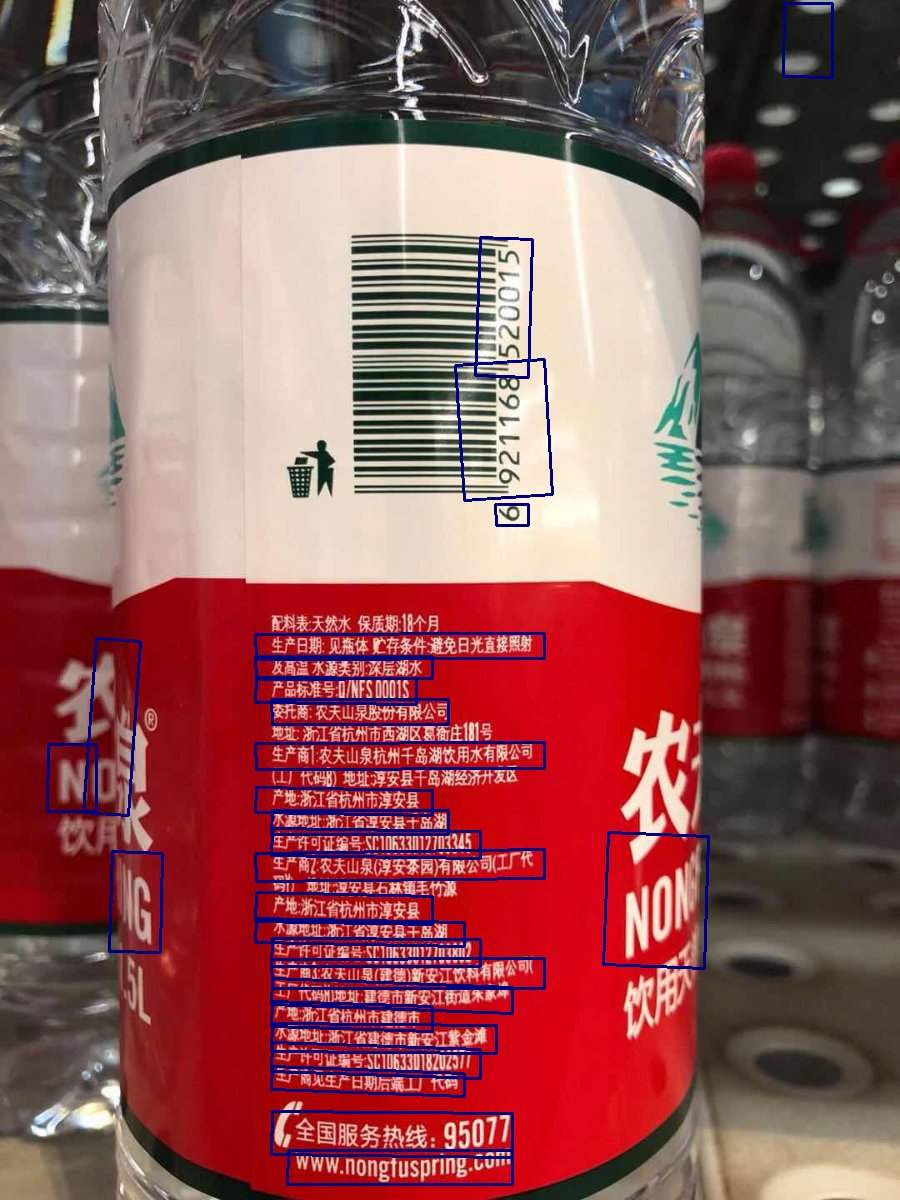

In [27]:
im = Image.open(paths[0])
img = np.array(im.convert('RGB'))
t = time.time()
result,img,angle = model.model(img,model='crnn', detectAngle=False) ## if model == crnn ,you should install pytorch
print "It takes time:{}s".format(time.time()-t)
print "---------------------------------------"
print "图像的文字朝向为:{}度\n".format(angle),"识别结果:\n"

for key in result:
    print result[key][1]
    
Image.fromarray(img)

## keras crnn 

It takes time:7.70376205444s
---------------------------------------
图像的文字朝向为:0度
识别结果:

M7i
飞MUwlcldml
 @
「 盈MQ宫
昏舰8g氧l
(SW(S
JDARKCHOOOLAE(
园哑
月川加da的MMaliw:swa5%陷 
Senwing
:瑞士小姐浓情巧克力冲饮粉 
.Serdgg
川awnspy7wiiM阳降?W站
:原产国:美国
师:a
la"yi
，氢化耀子油，胞脂
.@iaral》
单,双甘油席肪酸
al站
食用盐，磷酸氢二 
，少于 的配料:
卡奶，碳酸钙;
食用香料。
牛奶，
卡植腔，
a:滋氧L葡。
几KNM响12证(A额,[
生产日期:2017年06月2?日
:&e)wmi临融倒崛固眩
 保质期至:2019年06月17日
 处存方式:储存于阴凉干燥处。
lam%ima: 曲ia够mmiM
Carbonj
，倒入175m]温水或
取一包冲你粉 
“冲袍方法:
牙73邵23i82/
充分揽掉即可饮用。
:牛奶。
Dieia
 中国总经销商:大昌洋行 上海 有限公司
_董差威企羞
Su@
 旦地址:上海市外高桥保税区巴圣路275=__
lmportedanddistributae
 40号樱第一层西部位
NRY喇
每100克
项目
Chales
alChinaMarket
Go0div
二电话:021-63556206
21%
1796千焦
Sodium
9%
5.3克
图片仅供参考
.蠢自质
6086320C
Viamin
脂 
11.0
Te:+8621
飞反式隔寂
lmportedanddistribute
Vitamin
25%
76.4》
 疏
 碟水化含物
渝量
Co.LTD
MisungFamiy
312GunammuTBD,3G
Namdaemunno5GA,
lrO0n
Tel:+822-723-8175
DECLARACJdNDElNBWEDlENTE:
nlE刚TSTATEMEMT:SUGAR,CORN


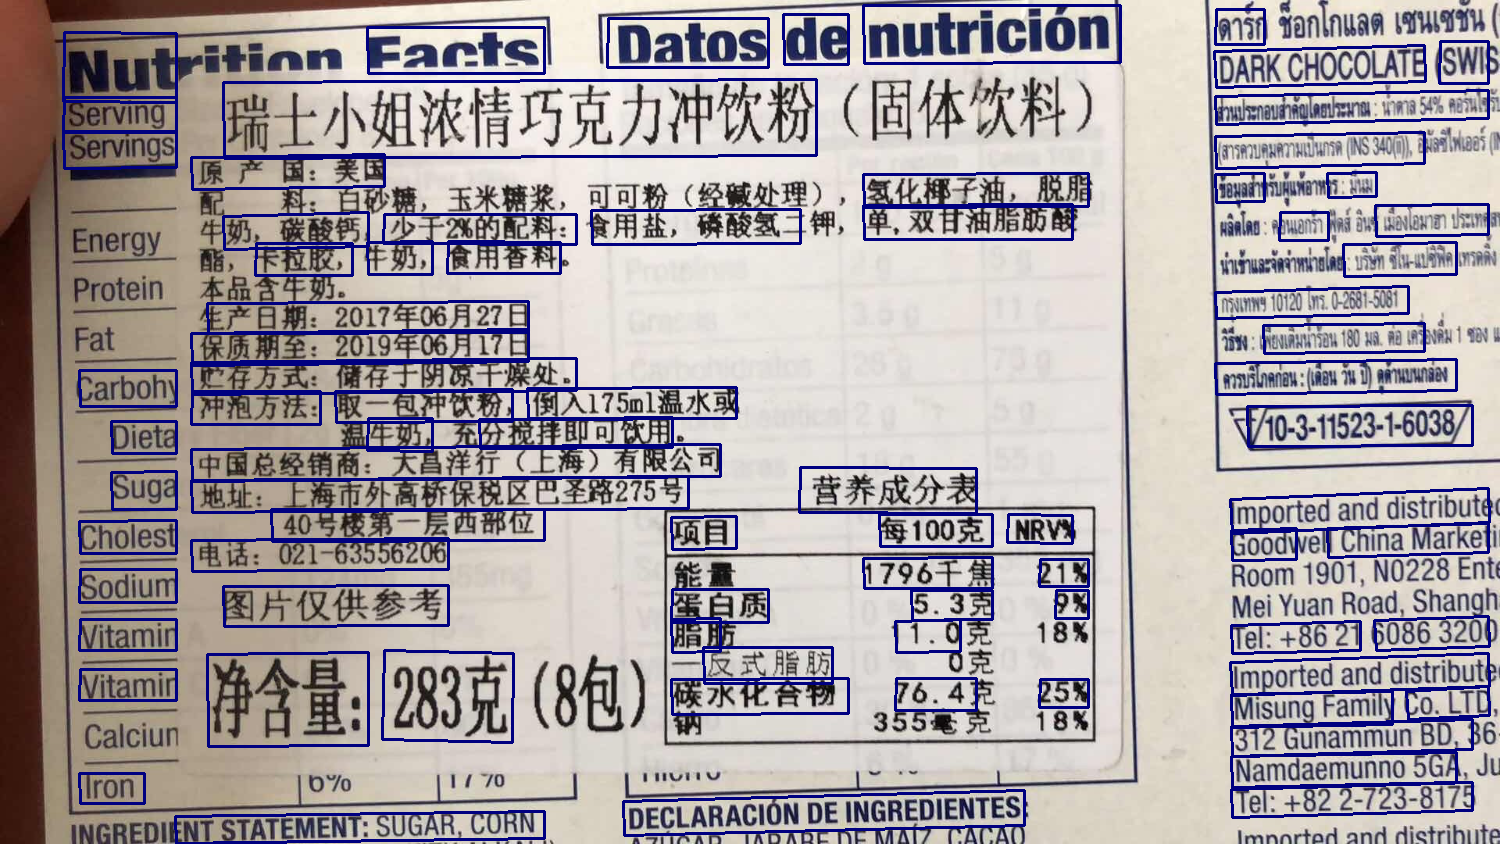

In [25]:
im = Image.open(paths[0])
img = np.array(im.convert('RGB'))
t = time.time()
result,img,angle = model.model(img,model='keras',detectAngle=False) ##if model == keras ,you should install keras
print "It takes time:{}s".format(time.time()-t)
print "---------------------------------------"
print "图像的文字朝向为:{}度\n".format(angle),"识别结果:\n"
for key in result:
    print result[key][1]
Image.fromarray(img)